# **A. Linear Regression (using GPU)**

In [3]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
begintime = time.time()

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# Define the linear predictor
def prediction(x, w, b):
    return w * x + b

# Define different loss functions
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def mae_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * tf.abs(error) - 0.5 * tf.square(delta)
    return tf.reduce_mean(tf.where(is_small_error, squared_loss, linear_loss))

def hybrid_loss(y_true, y_pred, alpha=0.5):
    mse = mse_loss(y_true, y_pred)
    mae = mae_loss(y_true, y_pred)
    return alpha * mse + (1 - alpha) * mae



In [6]:
# Training loop function
def train_model(X, y, W, b, learning_rate, train_steps, loss_fn=[]): # The different losses are to be passed to the loss_fn array
  history = {}
  for i in loss_fn:
    if i==None: print(f"Specify a loss function")
    elif i: print(f"Training with {i.__name__}")

    key = f"loss_history_{i.__name__}"

    start_time = time.time()
    best_loss = float('inf')

    for step in range(train_steps):
        with tf.GradientTape() as tape:
            pred = prediction(X, W, b)
            loss = i(y, pred)

        gradients = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * gradients[0])
        b.assign_sub(learning_rate * gradients[1])

        current_loss = loss.numpy()
        history.setdefault(key, []).append(loss.numpy())

        if current_loss < best_loss:
            best_loss = current_loss
            patience_counter = 0
        else:
            patience_counter += 1

        # If the loss hasn't improved for 'patience' steps, reduce the learning rate.
        if patience_counter >= patience:
            learning_rate *= lr_decay_factor
            print(f"Reducing learning rate to {learning_rate:.6f} at step {i}")
            patience_counter = 0  # Reset the counter after reducing LR

        if step % 100 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds")
    print(f"{W, b, history[key]}")
    plot_results(X, y, W, b,  history[key], "Actual vs Predicted Linear Regression Results")

  # Compare all loss functions
  print(history)
  plt.figure(figsize=(10, 6))
  plt.plot(list(history.values())[0], label='MSE')
  plt.plot(list(history.values())[1], label='MAE')
  plt.plot(list(history.values())[2], label='Huber')
  plt.plot(list(history.values())[3], label='Hybrid')
  plt.xlabel('Step')
  plt.ylabel('Loss')
  plt.title('Comparison of Loss Functions')
  plt.legend()
  plt.grid(True)
  plt.show()

In [7]:
# Plot results
def plot_results(X, y, W, b, loss_history, title="Linear Regression Rts"):
    plt.figure(figsize=(12, 5))

    # Plot the data and prediction
    plt.subplot(1, 2, 1)
    plt.scatter(X.numpy(), y.numpy(), alpha=0.5, label='Original Data')
    plt.scatter(X.numpy(), prediction(X, W, b).numpy(), alpha=0.1, label='Predicted Data')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Plot the loss history
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, "-")
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## SEED

In [8]:
# Converting first name to decimal for seed
NAME = "Damilola"
SEED = sum(ord(c) for c in NAME)
tf.random.set_seed(SEED)
np.random.seed(SEED)


## Using random Normal (Guassian) Noise

Using Normal Noise
Training with mse_loss
Step 0, Loss: 16.0550
Step 100, Loss: 10.6824
Step 200, Loss: 7.1088
Step 300, Loss: 4.7317
Step 400, Loss: 3.1505
Step 500, Loss: 2.0988
Step 600, Loss: 1.3993
Step 700, Loss: 0.9339
Step 800, Loss: 0.6244
Step 900, Loss: 0.4185

Training completed in 4.10 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.638631], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6266465], dtype=float32)>, [16.055012, 15.989723, 15.924701, 15.859943, 15.79545, 15.731217, 15.667248, 15.60354, 15.540089, 15.476894, 15.413961, 15.351281, 15.2888565, 15.226686, 15.16477, 15.103105, 15.04169, 14.980525, 14.919611, 14.858942, 14.798522, 14.738346, 14.678416, 14.618731, 14.559285, 14.500084, 14.441123, 14.382402, 14.323922, 14.2656765, 14.20767, 14.149899, 14.092363, 14.035063, 13.977994, 13.921157, 13.864551, 13.808177, 13.75203, 13.6961155, 13.640425, 13.584962, 13.529725, 13.474713, 13.419923, 13.365357, 

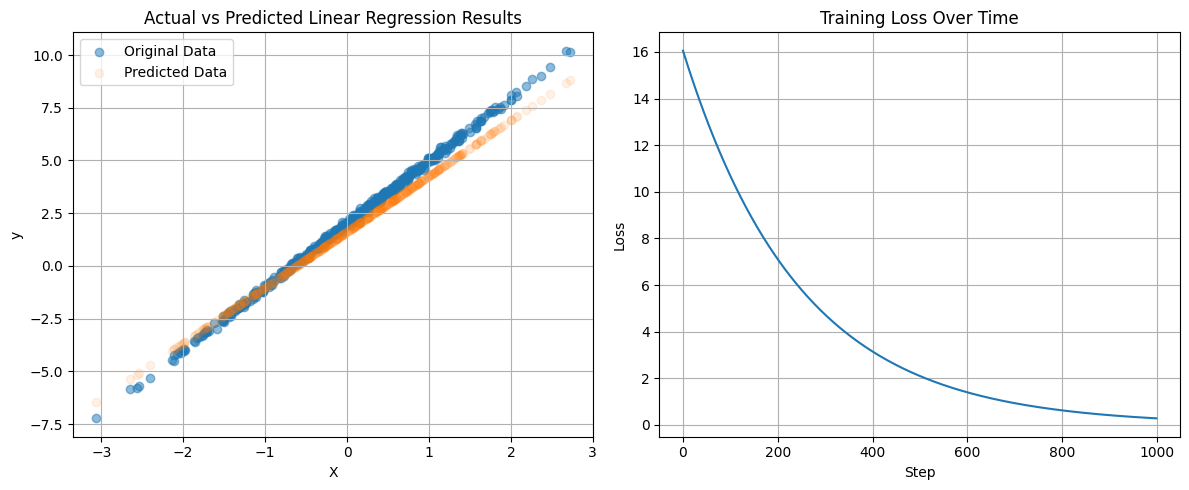

Training with mae_loss
Step 0, Loss: 0.4444
Step 100, Loss: 0.3733
Step 200, Loss: 0.3046
Step 300, Loss: 0.2377
Step 400, Loss: 0.1760
Step 500, Loss: 0.1243
Step 600, Loss: 0.0936
Step 700, Loss: 0.0833
Step 800, Loss: 0.0800
Step 900, Loss: 0.0791

Training completed in 4.12 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9983952], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.994877], dtype=float32)>, [0.4443617, 0.44364557, 0.44292945, 0.44221333, 0.44149727, 0.44078112, 0.440065, 0.4393489, 0.43863282, 0.4379167, 0.43720058, 0.43648446, 0.43576834, 0.43505225, 0.43433616, 0.4336211, 0.43290743, 0.43219382, 0.4314802, 0.43076655, 0.4300529, 0.42933923, 0.4286256, 0.42791203, 0.42719832, 0.42648473, 0.42577112, 0.42505747, 0.42434385, 0.42363018, 0.42291656, 0.42220294, 0.42148927, 0.42077562, 0.420062, 0.41934833, 0.41863474, 0.41792113, 0.41720748, 0.4164938, 0.41578022, 0.41506657, 0.41435292, 0.41363972, 0.412926

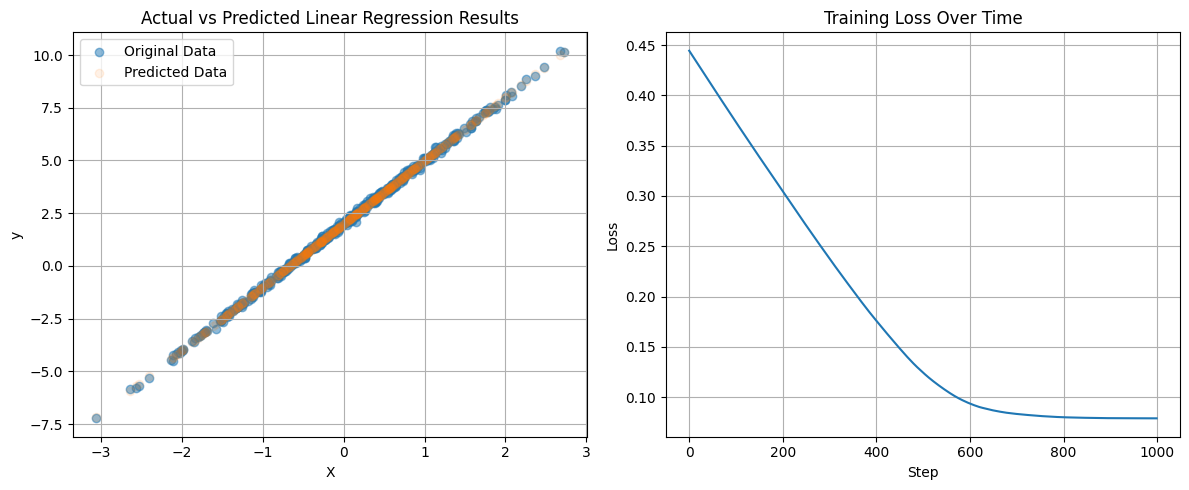

Training with huber_loss
Step 0, Loss: 0.0048
Step 100, Loss: 0.0048
Step 200, Loss: 0.0048
Step 300, Loss: 0.0048
Step 400, Loss: 0.0048
Step 500, Loss: 0.0048
Step 600, Loss: 0.0048
Step 700, Loss: 0.0048
Step 800, Loss: 0.0048
Step 900, Loss: 0.0048

Training completed in 7.25 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9972544], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.997843], dtype=float32)>, [0.00477609, 0.0047760666, 0.0047760415, 0.0047760173, 0.0047759926, 0.004775968, 0.0047759437, 0.0047759195, 0.004775895, 0.004775869, 0.0047758454, 0.004775821, 0.0047757956, 0.0047757714, 0.004775747, 0.0047757234, 0.004775699, 0.004775675, 0.0047756503, 0.004775625, 0.004775603, 0.004775578, 0.0047755553, 0.00477553, 0.004775508, 0.004775484, 0.0047754613, 0.0047754366, 0.0047754142, 0.0047753896, 0.0047753653, 0.004775342, 0.00477532, 0.0047752974, 0.0047752727, 0.004775249, 0.004775227, 0.004775203, 0.0047751805

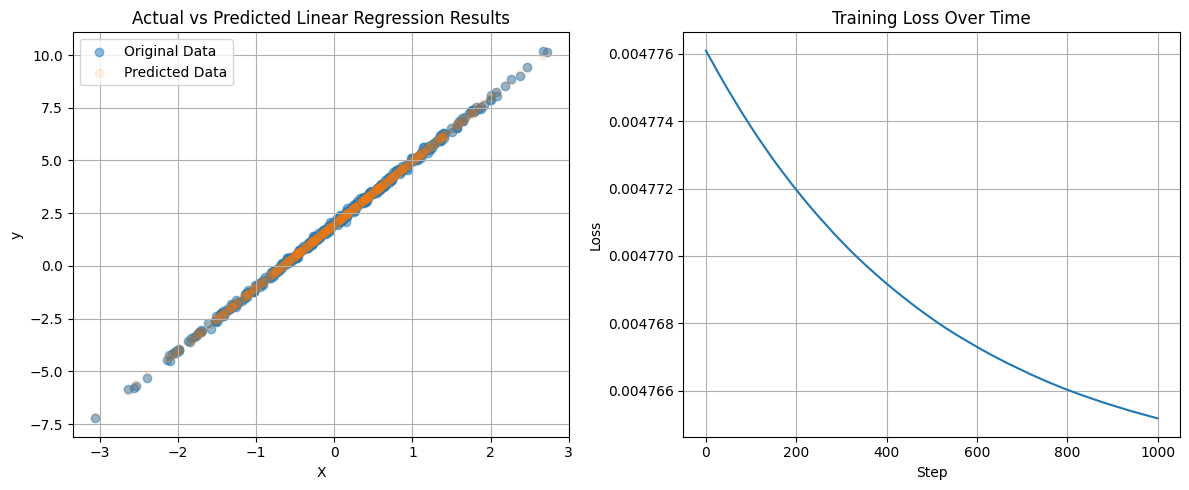

Training with hybrid_loss
Step 0, Loss: 0.0443
Step 100, Loss: 0.0442
Step 200, Loss: 0.0442
Step 300, Loss: 0.0442
Step 400, Loss: 0.0442
Step 500, Loss: 0.0442
Step 600, Loss: 0.0442
Step 700, Loss: 0.0442
Step 800, Loss: 0.0442
Step 900, Loss: 0.0442

Training completed in 5.75 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.0018644], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.996854], dtype=float32)>, [0.044251643, 0.044251326, 0.044251017, 0.0442507, 0.04425039, 0.044250075, 0.04424977, 0.04424946, 0.04424915, 0.044248838, 0.044248544, 0.044248234, 0.044247933, 0.044247627, 0.044247396, 0.044247255, 0.044247113, 0.044246968, 0.04424683, 0.04424668, 0.04424655, 0.044246405, 0.044246264, 0.04424613, 0.04424598, 0.044245847, 0.04424571, 0.044245567, 0.044245426, 0.044245295, 0.044245157, 0.04424502, 0.04424488, 0.044244744, 0.044244602, 0.044244476, 0.04424434, 0.0442442, 0.044244066, 0.044243935, 0.044243798, 0.044

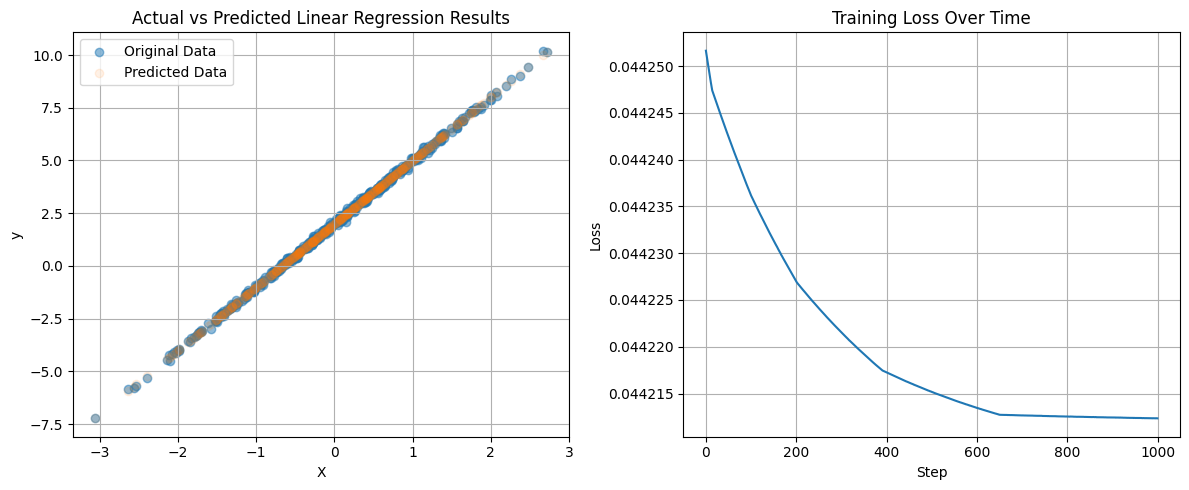

{'loss_history_mse_loss': [16.055012, 15.989723, 15.924701, 15.859943, 15.79545, 15.731217, 15.667248, 15.60354, 15.540089, 15.476894, 15.413961, 15.351281, 15.2888565, 15.226686, 15.16477, 15.103105, 15.04169, 14.980525, 14.919611, 14.858942, 14.798522, 14.738346, 14.678416, 14.618731, 14.559285, 14.500084, 14.441123, 14.382402, 14.323922, 14.2656765, 14.20767, 14.149899, 14.092363, 14.035063, 13.977994, 13.921157, 13.864551, 13.808177, 13.75203, 13.6961155, 13.640425, 13.584962, 13.529725, 13.474713, 13.419923, 13.365357, 13.311016, 13.256892, 13.202991, 13.149306, 13.095842, 13.042596, 12.989566, 12.936752, 12.8841505, 12.831764, 12.779592, 12.7276325, 12.675885, 12.624347, 12.573016, 12.521896, 12.470986, 12.420281, 12.369783, 12.31949, 12.269402, 12.219519, 12.169836, 12.1203575, 12.071079, 12.022003, 11.973125, 11.924445, 11.875965, 11.827682, 11.779594, 11.731703, 11.684006, 11.636506, 11.589194, 11.542078, 11.495153, 11.448421, 11.401876, 11.355521, 11.309358, 11.263379, 11.217

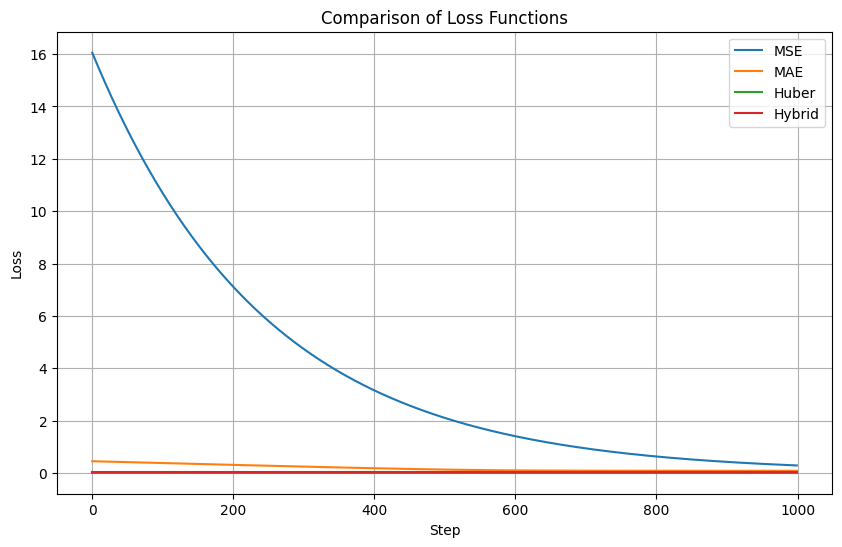

In [9]:
print("Using Normal Noise")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 0.001
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5

patience_counter = 0
# Generate data with noise
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise = tf.random.normal([NUM_EXAMPLES], mean=0.0, stddev=0.1)
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE,
            TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

## Using Laplacian noise

Using Guassian Noise
Training with mse_loss
Step 0, Loss: 9.7137
Step 100, Loss: 6.5652
Step 200, Loss: 4.4378
Step 300, Loss: 3.0002
Step 400, Loss: 2.0288
Step 500, Loss: 1.3725
Step 600, Loss: 0.9289
Step 700, Loss: 0.6292
Step 800, Loss: 0.4267
Step 900, Loss: 0.2899

Training completed in 3.46 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.7378032], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6441317], dtype=float32)>, [9.713659, 9.675676, 9.637841, 9.600155, 9.562616, 9.525226, 9.48798, 9.450879, 9.413925, 9.377114, 9.340448, 9.303925, 9.267546, 9.231309, 9.195213, 9.159258, 9.123445, 9.08777, 9.052237, 9.016841, 8.981584, 8.946465, 8.911485, 8.876638, 8.84193, 8.807359, 8.772922, 8.738619, 8.704451, 8.670416, 8.636515, 8.602746, 8.569109, 8.5356045, 8.502231, 8.4689865, 8.435873, 8.402889, 8.370034, 8.337309, 8.304709, 8.272239, 8.239896, 8.207679, 8.175588, 8.143621, 8.111781, 8.080066, 8.048473, 8.017005, 7.9

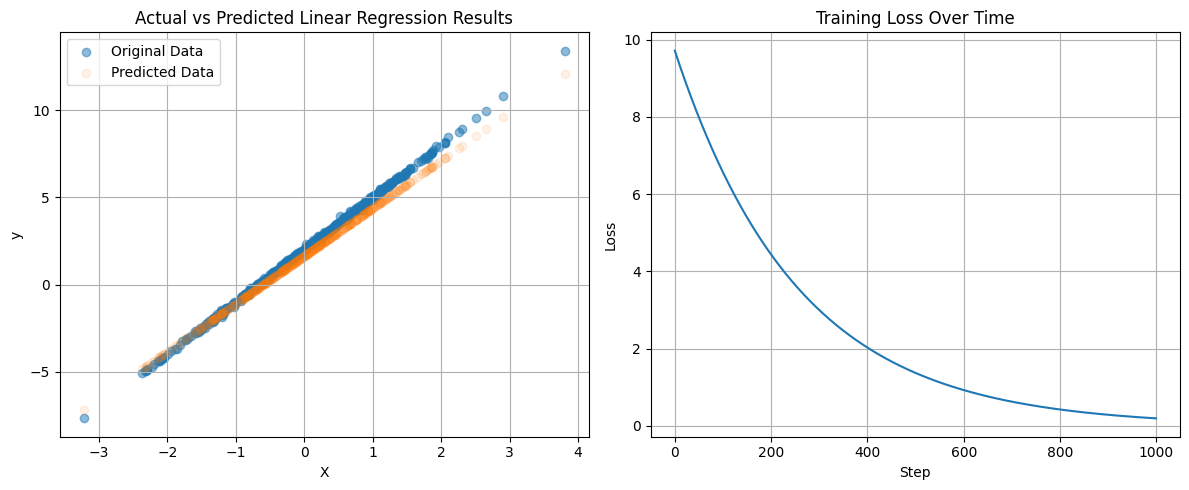

Training with mae_loss
Step 0, Loss: 0.3759
Step 100, Loss: 0.3042
Step 200, Loss: 0.2363
Step 300, Loss: 0.1729
Step 400, Loss: 0.1167
Step 500, Loss: 0.0713
Step 600, Loss: 0.0519
Step 700, Loss: 0.0497
Step 800, Loss: 0.0497
Step 900, Loss: 0.0497

Training completed in 3.54 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.99881], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.9997532], dtype=float32)>, [0.3758954, 0.3751644, 0.3744334, 0.37370232, 0.37297133, 0.3722403, 0.37150928, 0.37077826, 0.3700472, 0.36931625, 0.3685852, 0.36785418, 0.36712316, 0.36639217, 0.36566117, 0.36493012, 0.3641991, 0.36346802, 0.36273706, 0.36200604, 0.36127502, 0.360544, 0.35981297, 0.35908198, 0.3583515, 0.35762373, 0.3569, 0.35617712, 0.35545623, 0.3547353, 0.35401446, 0.35329357, 0.35257268, 0.35185176, 0.35113093, 0.35041, 0.3496891, 0.34896827, 0.34824732, 0.3475265, 0.34680557, 0.3460847, 0.3453638, 0.34464294, 0.34392202, 0.34320

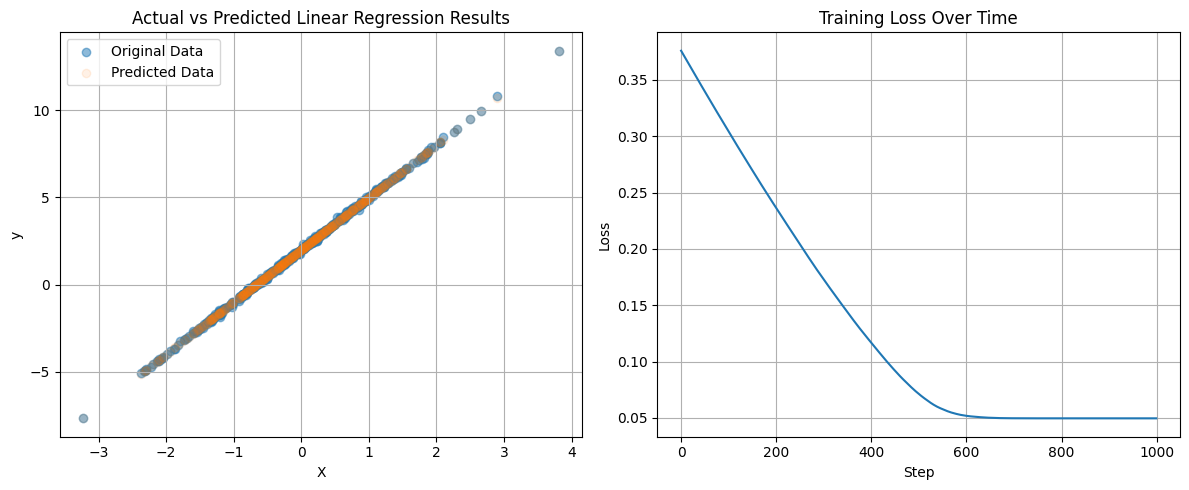

Training with huber_loss
Step 0, Loss: 0.0024
Step 100, Loss: 0.0024
Step 200, Loss: 0.0024
Step 300, Loss: 0.0024
Step 400, Loss: 0.0024
Step 500, Loss: 0.0024
Step 600, Loss: 0.0024
Step 700, Loss: 0.0024
Step 800, Loss: 0.0024
Step 900, Loss: 0.0024

Training completed in 7.31 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.998795], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0017388], dtype=float32)>, [0.0023750183, 0.0023750088, 0.0023749985, 0.002374989, 0.0023749797, 0.0023749697, 0.0023749599, 0.0023749499, 0.002374941, 0.0023749312, 0.0023749212, 0.0023749117, 0.0023749021, 0.0023748921, 0.0023748819, 0.0023748719, 0.002374862, 0.0023748532, 0.0023748432, 0.0023748344, 0.0023748255, 0.0023748148, 0.002374806, 0.002374797, 0.0023747862, 0.002374777, 0.0023747669, 0.0023747575, 0.0023747482, 0.002374739, 0.0023747294, 0.0023747196, 0.0023747103, 0.0023747012, 0.0023746914, 0.0023746819, 0.0023746733, 0.002374664

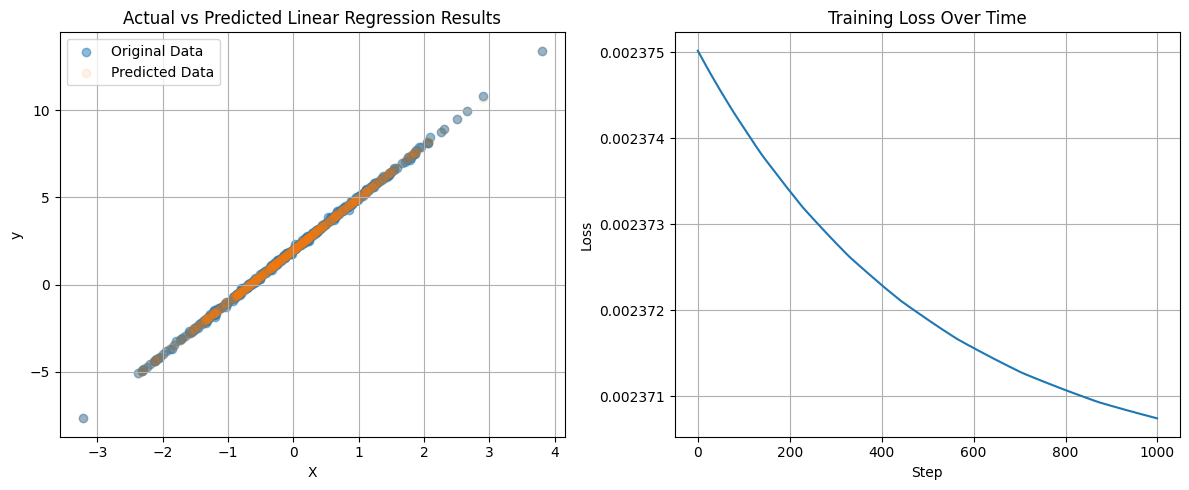

Training with hybrid_loss
Step 0, Loss: 0.0272
Step 100, Loss: 0.0272
Step 200, Loss: 0.0272
Step 300, Loss: 0.0272
Step 400, Loss: 0.0272
Step 500, Loss: 0.0272
Step 600, Loss: 0.0272
Step 700, Loss: 0.0272
Step 800, Loss: 0.0272
Step 900, Loss: 0.0272

Training completed in 5.76 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9986355], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.9999754], dtype=float32)>, [0.027229715, 0.027229425, 0.027229136, 0.027228849, 0.027228566, 0.027228273, 0.027227992, 0.027227707, 0.027227417, 0.027227128, 0.02722687, 0.027226644, 0.02722643, 0.027226212, 0.027225995, 0.027225778, 0.027225556, 0.027225345, 0.027225127, 0.027224908, 0.027224699, 0.027224496, 0.027224336, 0.027224172, 0.02722402, 0.027223866, 0.02722371, 0.027223552, 0.027223393, 0.027223228, 0.027223077, 0.027222916, 0.027222756, 0.027222607, 0.02722245, 0.02722229, 0.027222134, 0.027221981, 0.027221829, 0.027221667, 0.0272

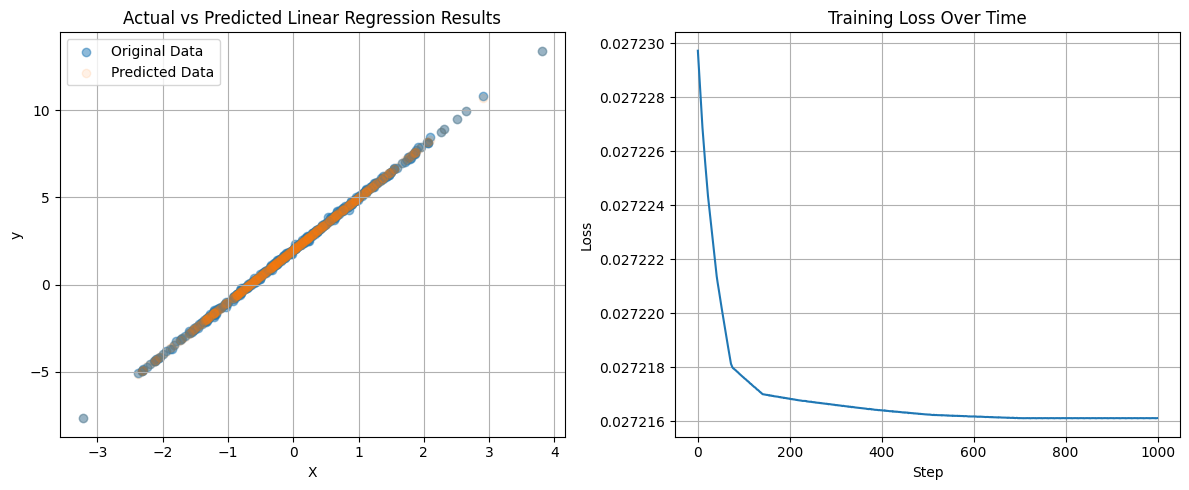

{'loss_history_mse_loss': [9.713659, 9.675676, 9.637841, 9.600155, 9.562616, 9.525226, 9.48798, 9.450879, 9.413925, 9.377114, 9.340448, 9.303925, 9.267546, 9.231309, 9.195213, 9.159258, 9.123445, 9.08777, 9.052237, 9.016841, 8.981584, 8.946465, 8.911485, 8.876638, 8.84193, 8.807359, 8.772922, 8.738619, 8.704451, 8.670416, 8.636515, 8.602746, 8.569109, 8.5356045, 8.502231, 8.4689865, 8.435873, 8.402889, 8.370034, 8.337309, 8.304709, 8.272239, 8.239896, 8.207679, 8.175588, 8.143621, 8.111781, 8.080066, 8.048473, 8.017005, 7.9856606, 7.9544377, 7.923338, 7.8923593, 7.861502, 7.830765, 7.800148, 7.7696505, 7.7392735, 7.7090154, 7.6788745, 7.648852, 7.618947, 7.5891595, 7.559488, 7.5299325, 7.500493, 7.4711685, 7.441959, 7.4128637, 7.383882, 7.355014, 7.326258, 7.297616, 7.269085, 7.240666, 7.2123575, 7.184161, 7.1560736, 7.128097, 7.1002293, 7.072471, 7.044821, 7.017279, 6.989845, 6.9625187, 6.9352984, 6.908185, 6.8811784, 6.854276, 6.8274803, 6.800788, 6.7742014, 6.747719, 6.721338, 6.695

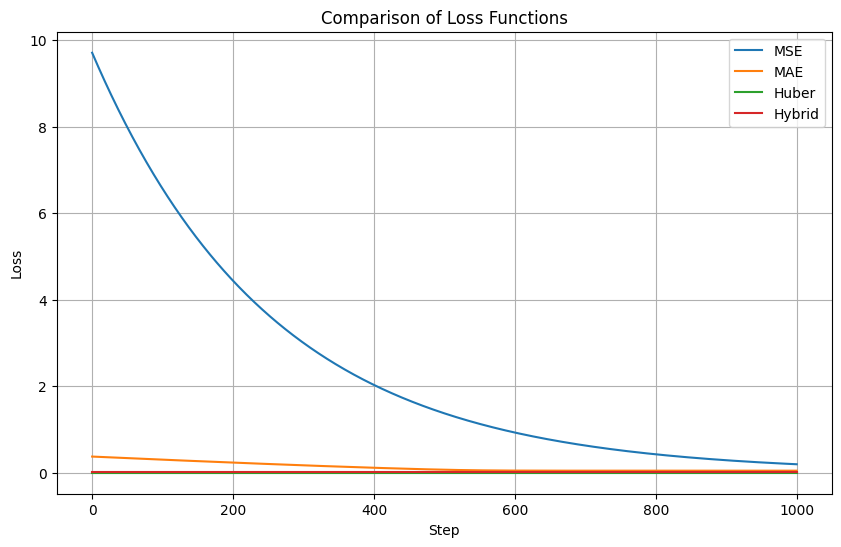

In [10]:
print("Using Guassian Noise")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 0.001
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))


noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )




## Change Learning Rate and using same level of Guassian Noise

Changing the Learning Rate
Training with mse_loss
Step 0, Loss: 12.1868
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 2.500000 at step <function mse_loss at 0x785dc9e380e0>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 1.250000 at step <function mse_loss at 0x785dc9e380e0>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.625000 at step <function mse_loss at 0x785dc9e380e0>
Step 900, Loss: nan

Training completed in 3.83 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [12.186835, 731.777, 48284.715, 3453062.8, 262012960.0, 20665600000.0, 1668436000000.0, 136517950000000.0, 1.1254221e+16, 9.315836e+17, 7.728527e+19, 6.419421e+21, 5.3355355e+23, 4.4362146e+25, 3.6891756e+27, 3.068247e+29, 2.5519677e+31, 2.122623e+33, 1.7655388e+35, inf, inf, inf, inf, inf, 

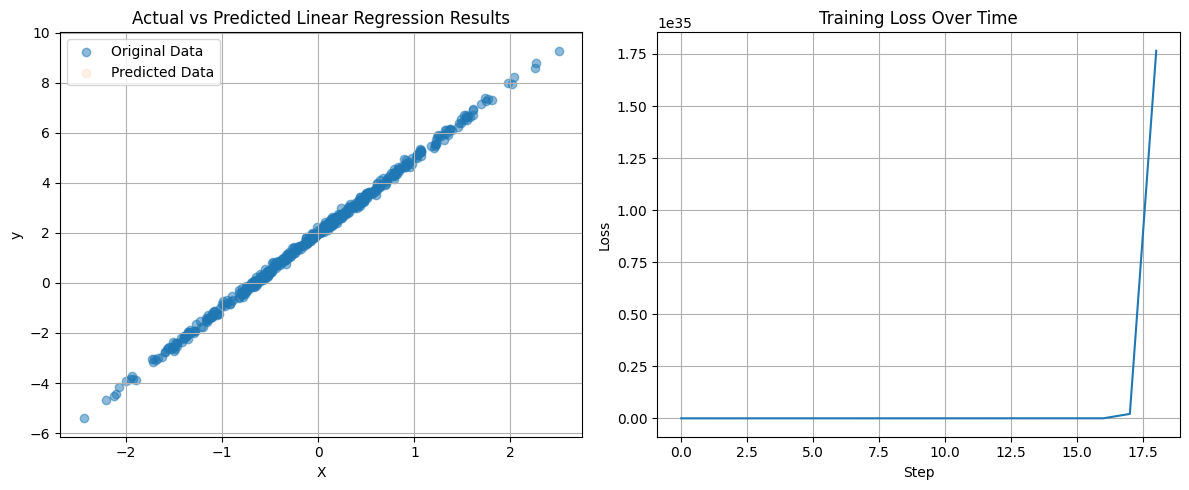

Training with mae_loss
Step 0, Loss: nan
Step 100, Loss: nan
Reducing learning rate to 0.312500 at step <function mae_loss at 0x785dc9e38180>
Step 200, Loss: nan
Step 300, Loss: nan
Step 400, Loss: nan
Reducing learning rate to 0.156250 at step <function mae_loss at 0x785dc9e38180>
Step 500, Loss: nan
Step 600, Loss: nan
Step 700, Loss: nan
Reducing learning rate to 0.078125 at step <function mae_loss at 0x785dc9e38180>
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 3.71 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

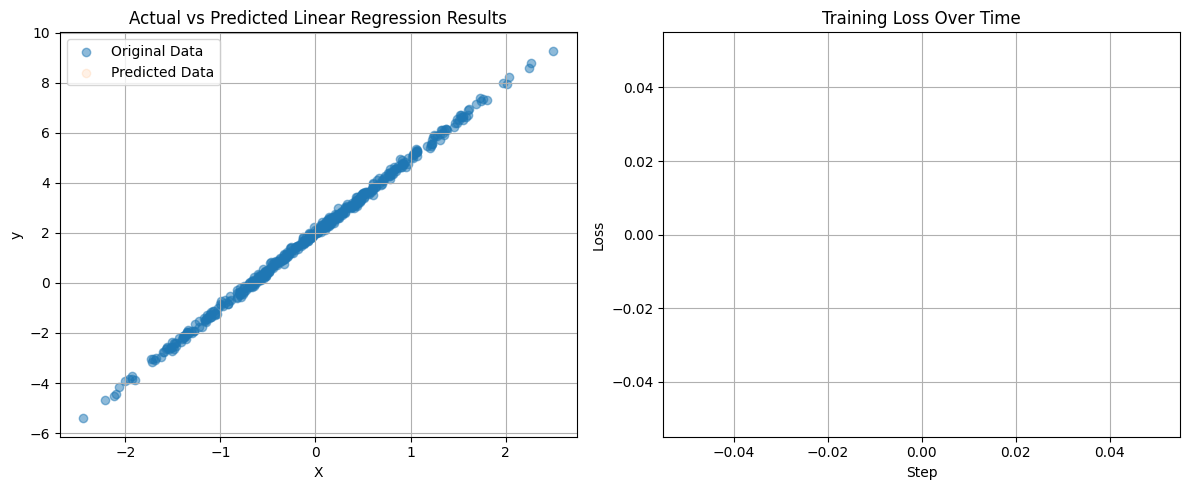

Training with huber_loss
Step 0, Loss: nan
Reducing learning rate to 0.039062 at step <function huber_loss at 0x785dc9e382c0>
Step 100, Loss: nan
Step 200, Loss: nan
Step 300, Loss: nan
Reducing learning rate to 0.019531 at step <function huber_loss at 0x785dc9e382c0>
Step 400, Loss: nan
Step 500, Loss: nan
Step 600, Loss: nan
Reducing learning rate to 0.009766 at step <function huber_loss at 0x785dc9e382c0>
Step 700, Loss: nan
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 7.24 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

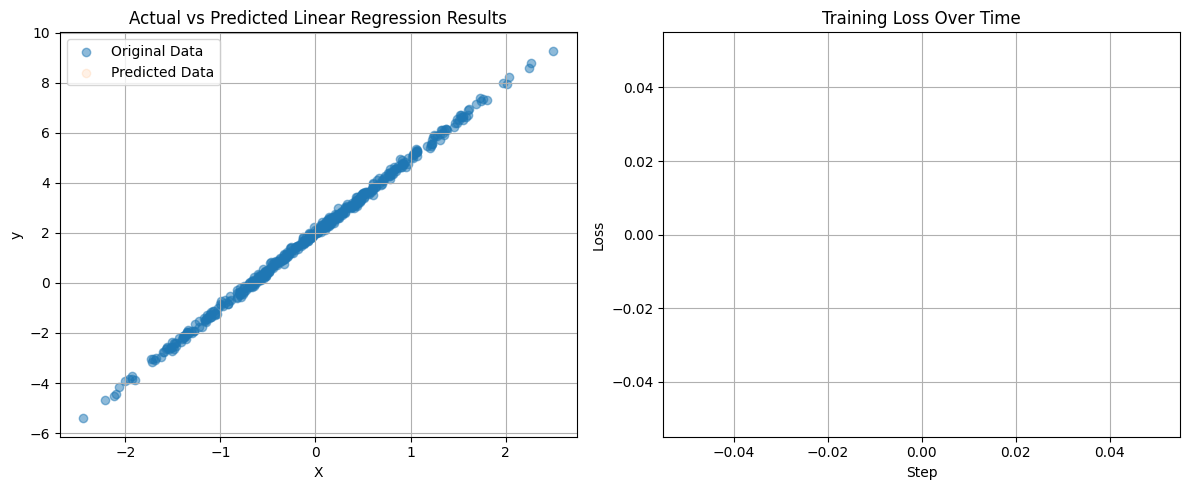

Training with hybrid_loss
Reducing learning rate to 0.004883 at step <function hybrid_loss at 0x785dc9e38220>
Step 0, Loss: nan
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 0.002441 at step <function hybrid_loss at 0x785dc9e38220>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 0.001221 at step <function hybrid_loss at 0x785dc9e38220>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.000610 at step <function hybrid_loss at 0x785dc9e38220>
Step 900, Loss: nan

Training completed in 5.14 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

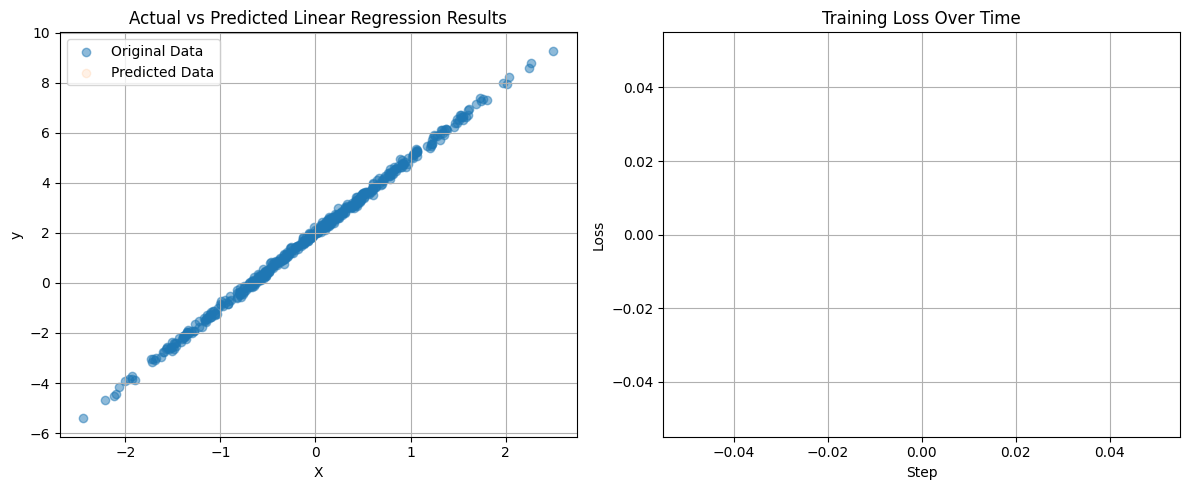

{'loss_history_mse_loss': [12.186835, 731.777, 48284.715, 3453062.8, 262012960.0, 20665600000.0, 1668436000000.0, 136517950000000.0, 1.1254221e+16, 9.315836e+17, 7.728527e+19, 6.419421e+21, 5.3355355e+23, 4.4362146e+25, 3.6891756e+27, 3.068247e+29, 2.5519677e+31, 2.122623e+33, 1.7655388e+35, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

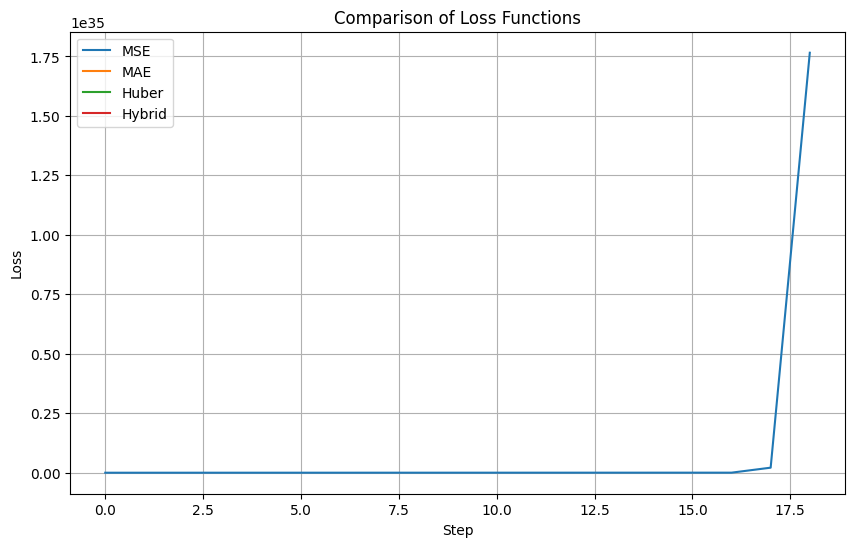

In [11]:
print("Changing the Learning Rate")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 5
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Generate data with noise
noise = tf.random.normal([NUM_EXAMPLES], mean=0.0, stddev=0.1)
y = X * 3 + 2 + noise

train_model(X, y, W, b, LEARNING_RATE,
            TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

## Change Learning Rate and using same level of Laplacian Noise

Changing the Learning Rate to 5
Training with mse_loss
Step 0, Loss: 9.9626
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 2.500000 at step <function mse_loss at 0x785dc9e380e0>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 1.250000 at step <function mse_loss at 0x785dc9e380e0>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.625000 at step <function mse_loss at 0x785dc9e380e0>
Step 900, Loss: nan

Training completed in 3.88 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [9.962599, 833.30743, 69754.73, 5840760.0, 489197630.0, 40983896000.0, 3434399100000.0, 287867030000000.0, 2.4134134e+16, 2.0237918e+18, 1.6974204e+20, 1.4239618e+22, 1.19478135e+24, 1.002665e+26, 8.415827e+27, 7.064923e+29, 5.931774e+31, 4.9810922e+33, 4.1833543e+35, inf, inf, inf, inf,

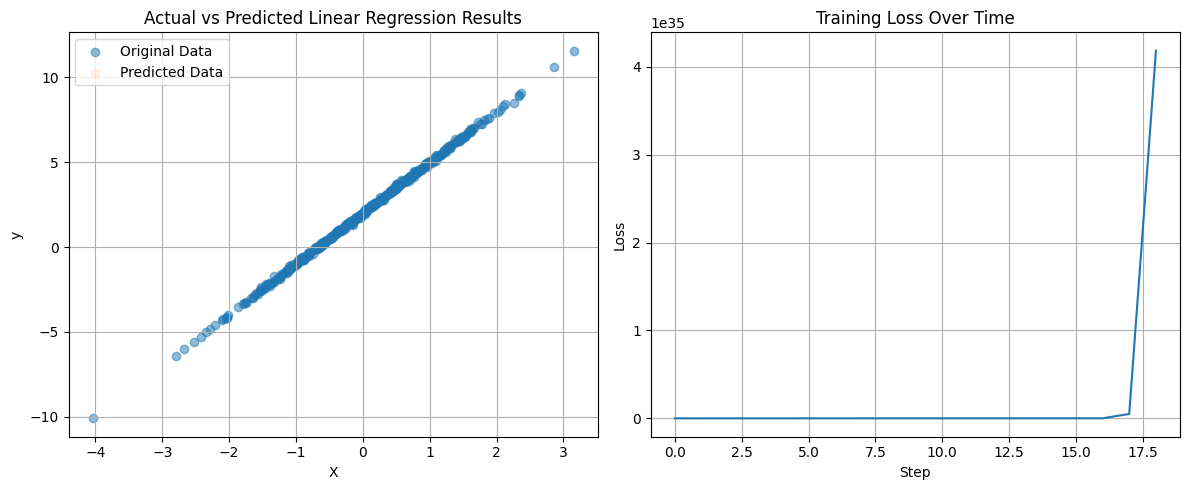

Training with mae_loss
Step 0, Loss: nan
Step 100, Loss: nan
Reducing learning rate to 0.312500 at step <function mae_loss at 0x785dc9e38180>
Step 200, Loss: nan
Step 300, Loss: nan
Step 400, Loss: nan
Reducing learning rate to 0.156250 at step <function mae_loss at 0x785dc9e38180>
Step 500, Loss: nan
Step 600, Loss: nan
Step 700, Loss: nan
Reducing learning rate to 0.078125 at step <function mae_loss at 0x785dc9e38180>
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 3.47 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

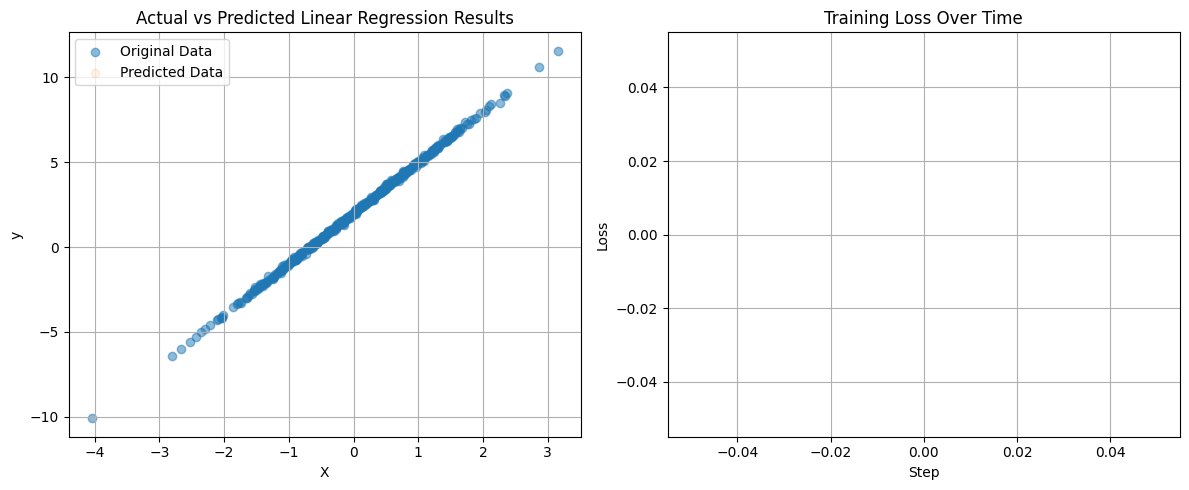

Training with huber_loss
Step 0, Loss: nan
Reducing learning rate to 0.039062 at step <function huber_loss at 0x785dc9e382c0>
Step 100, Loss: nan
Step 200, Loss: nan
Step 300, Loss: nan
Reducing learning rate to 0.019531 at step <function huber_loss at 0x785dc9e382c0>
Step 400, Loss: nan
Step 500, Loss: nan
Step 600, Loss: nan
Reducing learning rate to 0.009766 at step <function huber_loss at 0x785dc9e382c0>
Step 700, Loss: nan
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 7.12 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

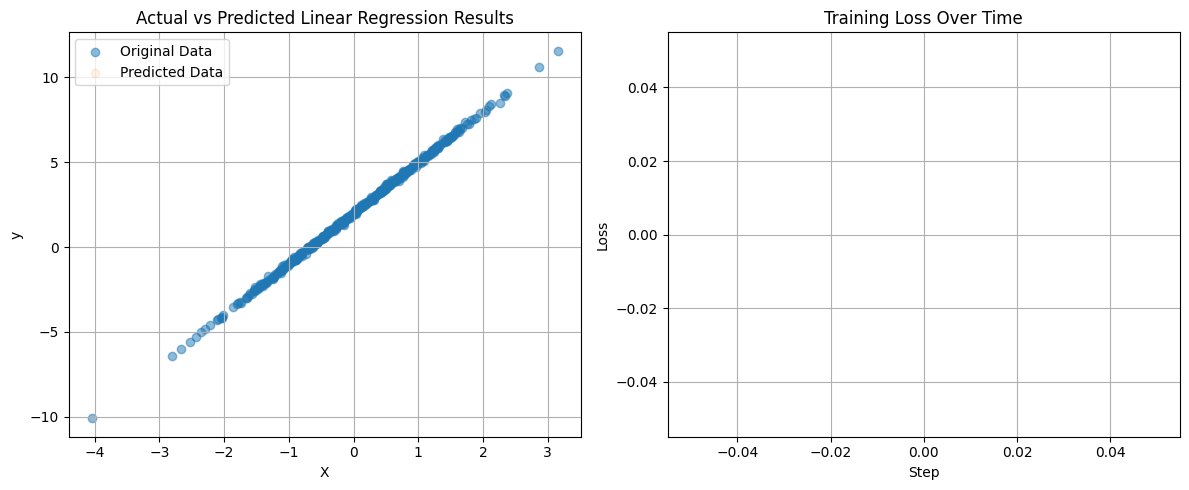

Training with hybrid_loss
Reducing learning rate to 0.004883 at step <function hybrid_loss at 0x785dc9e38220>
Step 0, Loss: nan
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 0.002441 at step <function hybrid_loss at 0x785dc9e38220>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 0.001221 at step <function hybrid_loss at 0x785dc9e38220>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.000610 at step <function hybrid_loss at 0x785dc9e38220>
Step 900, Loss: nan

Training completed in 5.17 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

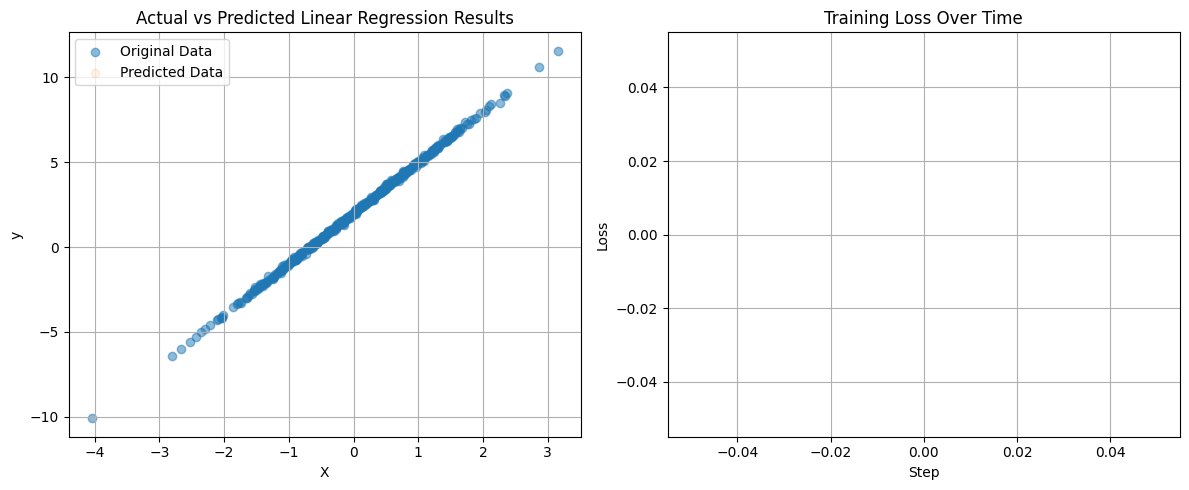

{'loss_history_mse_loss': [9.962599, 833.30743, 69754.73, 5840760.0, 489197630.0, 40983896000.0, 3434399100000.0, 287867030000000.0, 2.4134134e+16, 2.0237918e+18, 1.6974204e+20, 1.4239618e+22, 1.19478135e+24, 1.002665e+26, 8.415827e+27, 7.064923e+29, 5.931774e+31, 4.9810922e+33, 4.1833543e+35, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

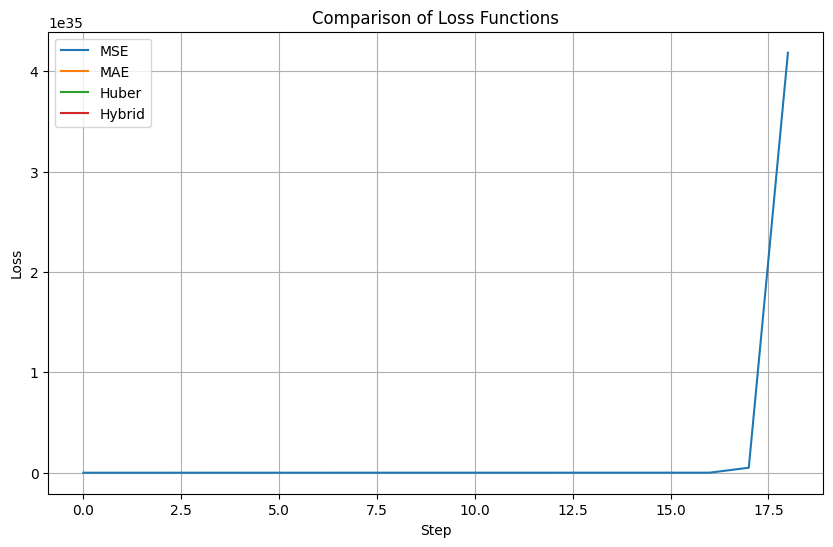

In [12]:
print("Changing the Learning Rate to 5")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 5
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )



## Using Learning rate = 1.0

Changing the Learning Rate to 5
Training with mse_loss
Step 0, Loss: 18.0236
Step 100, Loss: 193707999232.0000
Step 200, Loss: 5755857028958254006272.0000
Reducing learning rate to 0.500000 at step <function mse_loss at 0x785dc9e380e0>
Step 300, Loss: 171029714494101119791969194737664.0000
Step 400, Loss: 0.0049
Step 500, Loss: 0.0049
Step 600, Loss: 0.0049
Reducing learning rate to 0.250000 at step <function mse_loss at 0x785dc9e380e0>
Step 700, Loss: 0.0049
Step 800, Loss: 0.0049
Step 900, Loss: 0.0049
Reducing learning rate to 0.125000 at step <function mse_loss at 0x785dc9e380e0>

Training completed in 3.88 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.000315], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0012648], dtype=float32)>, [18.023636, 19.640205, 21.743853, 24.466787, 27.97723, 32.48932, 38.275627, 45.683002, 55.152935, 67.24729, 82.681145, 102.36474, 127.456436, 159.43044, 200.16318, 252.04262, 318.10806,

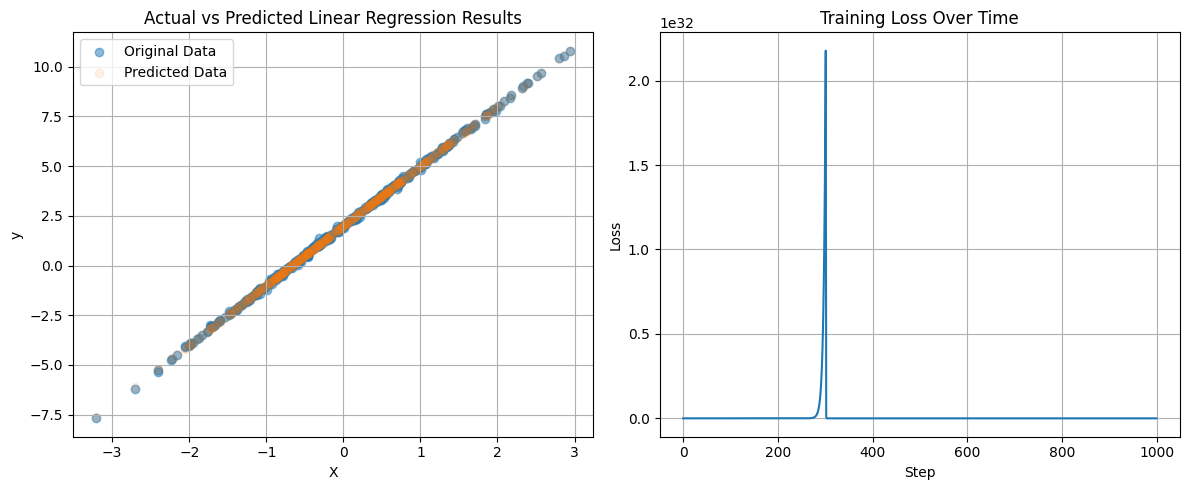

Training with mae_loss
Step 0, Loss: 0.0503
Step 100, Loss: 0.0528
Step 200, Loss: 0.0528
Reducing learning rate to 0.062500 at step <function mae_loss at 0x785dc9e38180>
Step 300, Loss: 0.0528
Step 400, Loss: 0.0503
Step 500, Loss: 0.0503
Step 600, Loss: 0.0503
Reducing learning rate to 0.031250 at step <function mae_loss at 0x785dc9e38180>
Step 700, Loss: 0.0503
Step 800, Loss: 0.0503
Step 900, Loss: 0.0503

Training completed in 3.48 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9998312], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.001577], dtype=float32)>, [0.050312582, 0.050350167, 0.050508767, 0.0506997, 0.051315557, 0.051417436, 0.051633928, 0.051910155, 0.051576152, 0.051969577, 0.052059393, 0.052724008, 0.051770136, 0.05235368, 0.05181913, 0.05230418, 0.05182663, 0.052298192, 0.051797703, 0.05239614, 0.051697113, 0.05196398, 0.05170199, 0.051929887, 0.05180343, 0.05218721, 0.051721744, 0.05180136, 0.05205816

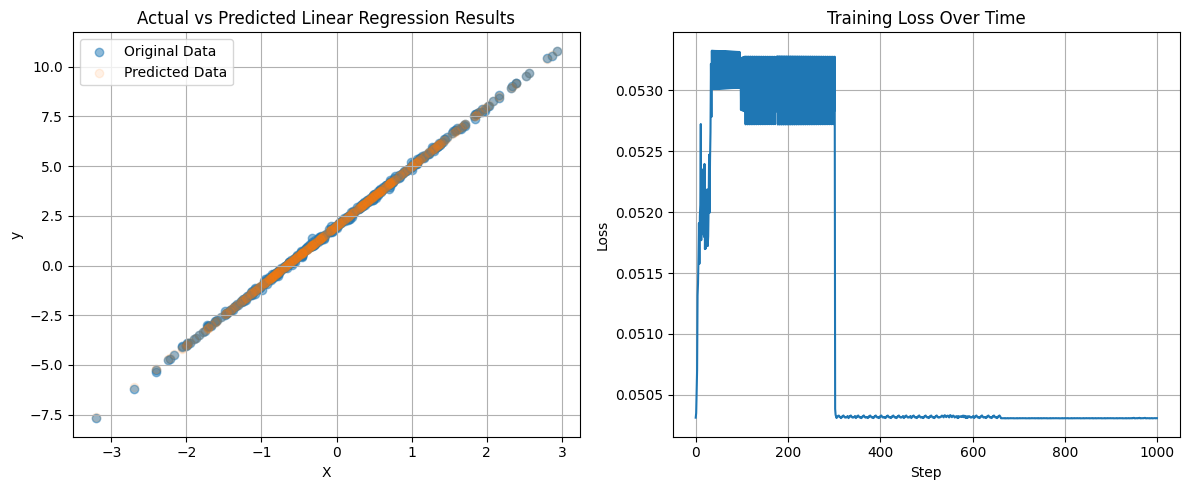

Training with huber_loss
Step 0, Loss: 0.0025
Step 100, Loss: 0.0025
Step 200, Loss: 0.0025
Step 300, Loss: 0.0025
Step 400, Loss: 0.0025
Reducing learning rate to 0.015625 at step <function huber_loss at 0x785dc9e382c0>
Step 500, Loss: 0.0025
Step 600, Loss: 0.0025
Step 700, Loss: 0.0025
Reducing learning rate to 0.007812 at step <function huber_loss at 0x785dc9e382c0>
Step 800, Loss: 0.0025
Step 900, Loss: 0.0025

Training completed in 6.59 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.0003114], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0012684], dtype=float32)>, [0.0024577088, 0.0024576974, 0.002457687, 0.0024576772, 0.0024576676, 0.0024576592, 0.0024576513, 0.002457643, 0.002457636, 0.00245763, 0.0024576243, 0.0024576175, 0.0024576115, 0.0024576073, 0.002457602, 0.002457598, 0.0024575933, 0.00245759, 0.0024575863, 0.0024575826, 0.0024575794, 0.0024575773, 0.0024575742, 0.002457571, 0.002457569, 0.0024575666, 0.

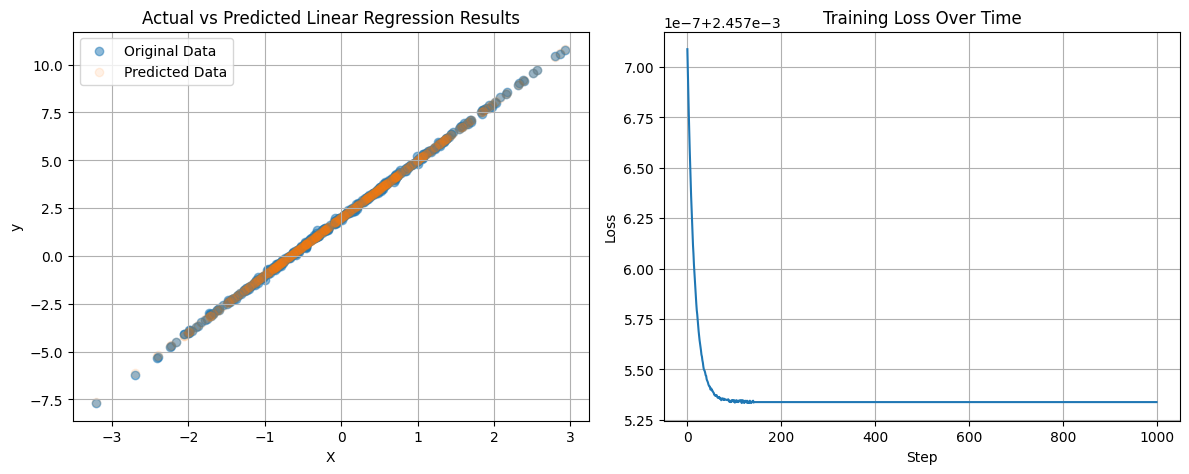

Training with hybrid_loss
Step 0, Loss: 0.0276
Step 100, Loss: 0.0276
Step 200, Loss: 0.0276
Step 300, Loss: 0.0276
Reducing learning rate to 0.003906 at step <function hybrid_loss at 0x785dc9e38220>
Step 400, Loss: 0.0276
Step 500, Loss: 0.0276
Step 600, Loss: 0.0276
Reducing learning rate to 0.001953 at step <function hybrid_loss at 0x785dc9e38220>
Step 700, Loss: 0.0276
Step 800, Loss: 0.0276
Step 900, Loss: 0.0276

Training completed in 5.60 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.999861], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.001454], dtype=float32)>, [0.02761378, 0.02761326, 0.027612746, 0.027612252, 0.027611941, 0.027611786, 0.027611636, 0.027611542, 0.02761147, 0.027611393, 0.027611326, 0.027611258, 0.027611207, 0.027611163, 0.027611146, 0.027611177, 0.027611142, 0.02761118, 0.027611155, 0.027611157, 0.027611166, 0.027611155, 0.027611148, 0.027611153, 0.02761116, 0.027611155, 0.027611174, 0.027611

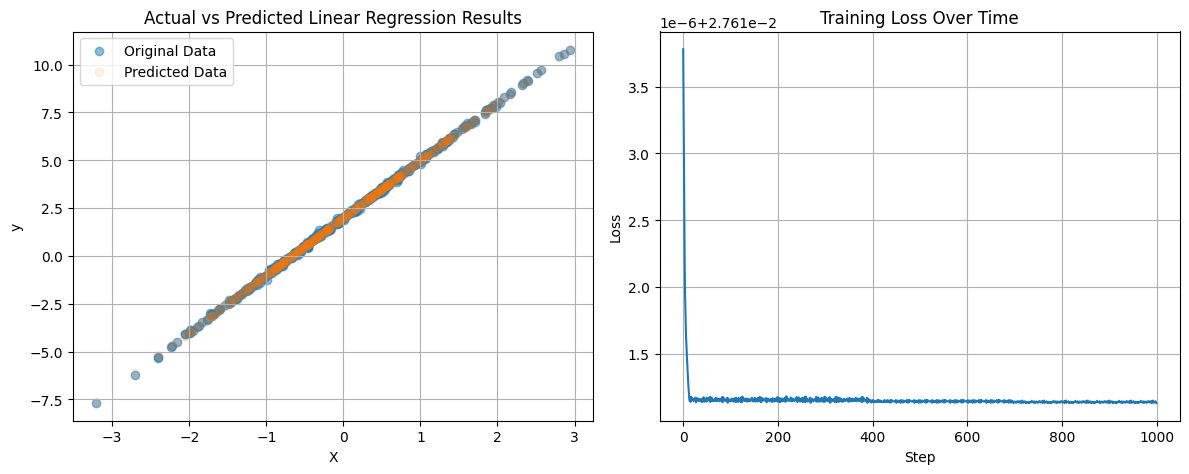

{'loss_history_mse_loss': [18.023636, 19.640205, 21.743853, 24.466787, 27.97723, 32.48932, 38.275627, 45.683002, 55.152935, 67.24729, 82.681145, 102.36474, 127.456436, 159.43044, 200.16318, 252.04262, 318.10806, 402.2277, 509.32452, 645.6641, 819.2207, 1040.1431, 1321.3484, 1679.2753, 2134.847, 2714.6914, 3452.6982, 4392.0, 5587.492, 7109.038, 9045.555, 11510.209, 14647.038, 18639.338, 23720.414, 30187.184, 38417.543, 48892.43, 62223.94, 79191.125, 100785.45, 128268.875, 163247.3, 207764.78, 264422.62, 336531.7, 428305.53, 545107.2, 693762.0, 882956.3, 1123746.1, 1430201.6, 1820230.8, 2316625.2, 2948391.8, 3752448.2, 4775779.5, 6078185.0, 7735765.0, 9845388.0, 12530335.0, 15947485.0, 20296528.0, 25831598.0, 32876140.0, 41841800.0, 53252496.0, 67775010.0, 86257976.0, 109781464.0, 139720000.0, 177823070.0, 226317330.0, 288036400.0, 366586940.0, 466559070.0, 593794750.0, 755728900.0, 961824000.0, 1224123600.0, 1557955100.0, 1982825700.0, 2523563000.0, 3211765000.0, 4087646500.0, 520239160

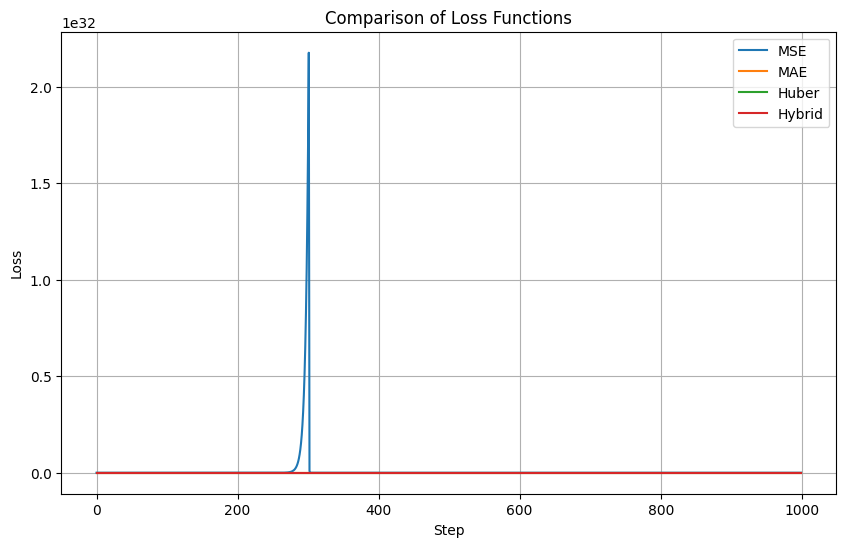

In [13]:
print("Changing the Learning Rate to 5")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 1
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

## GPU time

In [14]:

fullyfinishtime=time.time()

print(f"Total execution time {fullyfinishtime-begintime}")

Total execution time 110.77712345123291
